In [1]:
import os
import sys
from pathlib import Path
if str(Path.cwd().parent) not in sys.path:
    sys.path.append(str(Path.cwd().parent))

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.table import Table

from settings.paths import match_path

%load_ext autoreload
%autoreload 2

In [2]:
spec = pd.read_csv(os.path.join(match_path, 'STRIPE82_DR4_DR16Q1a_unWISE2a_GALEXDR672a.csv'))
print(len(spec))

37978


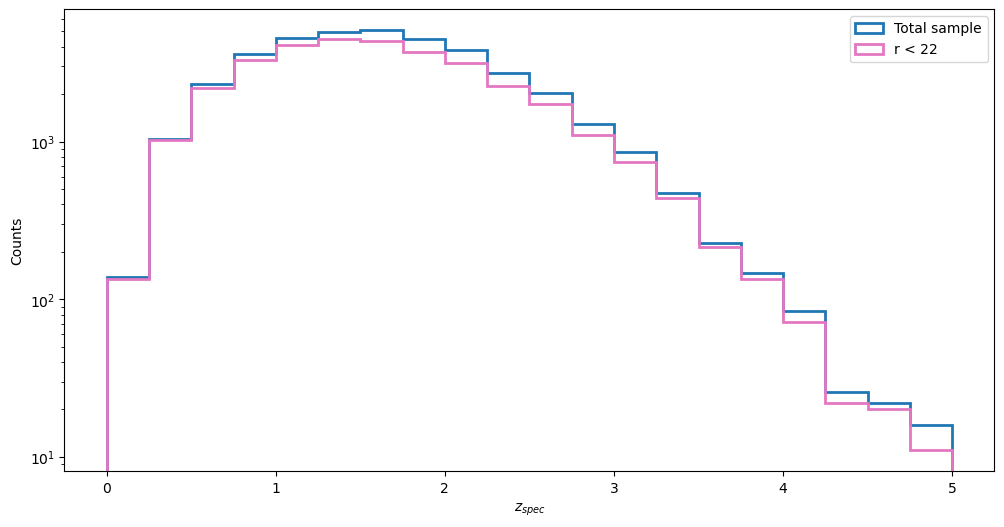

In [3]:
plt.figure(figsize=(12, 6))
bins = np.arange(0, 5.25, 0.25)
plt.hist(spec['Z'],
         bins=bins, label='Total sample',
         histtype='step', lw=2, log=True, color='tab:blue')
plt.hist(spec.query('r_PStotal < 22 | r_PStotal == 99')['Z'],
         bins=bins, label='r < 22',
         histtype='step', lw=2, log=True, color='tab:pink')
plt.xlabel('$z_{spec}$')
plt.ylabel('Counts')
plt.legend()
plt.show()

In [4]:
phot = pd.read_csv(os.path.join(match_path, 'STRIPE82_DR4.csv'))
print(len(phot))

10973634


In [8]:
phot.columns

Index(['Field', 'ID', 'RA', 'DEC', 'PhotoFlagDet', 'U_PStotal', 'e_U_PStotal',
       'F378_PStotal', 'e_F378_PStotal', 'F395_PStotal', 'e_F395_PStotal',
       'F410_PStotal', 'e_F410_PStotal', 'F430_PStotal', 'e_F430_PStotal',
       'G_PStotal', 'e_G_PStotal', 'F515_PStotal', 'e_F515_PStotal',
       'R_PStotal', 'e_R_PStotal', 'F660_PStotal', 'e_F660_PStotal',
       'I_PStotal', 'e_I_PStotal', 'F861_PStotal', 'e_F861_PStotal',
       'Z_PStotal', 'e_Z_PStotal', 'nDet_magPStotal'],
      dtype='object')

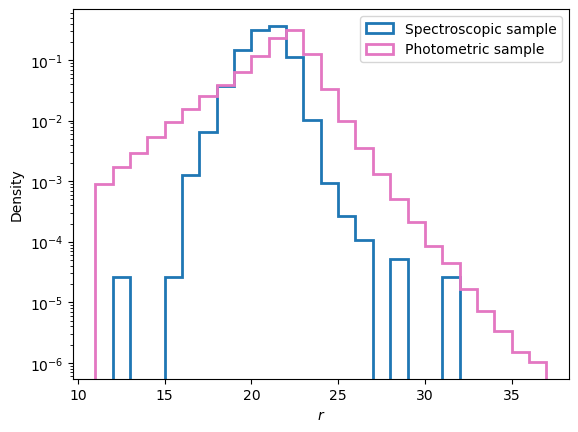

In [9]:
plt.figure()
bins = np.arange(11, 38, 1)
plt.hist(spec.query('r_PStotal != 99')['r_PStotal'],
         bins=bins, label='Spectroscopic sample',
         histtype='step', lw=2, log=True, density=True, color='tab:blue')
plt.hist(phot.query('R_PStotal != 99')['R_PStotal'],
         bins=bins, label='Photometric sample',
         histtype='step', lw=2, log=True, density=True, color='tab:pink')
plt.xlabel('$r$')
plt.ylabel('Density')
plt.legend()
plt.show()

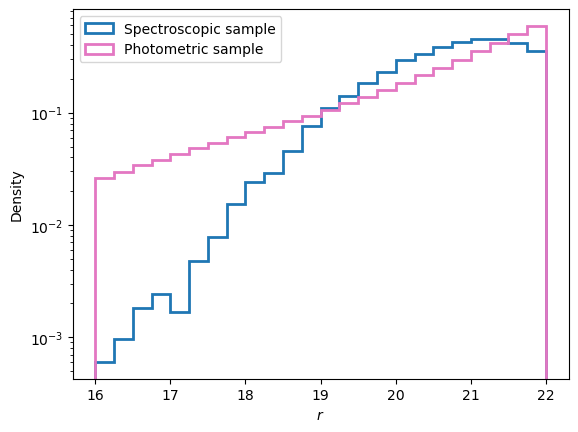

In [10]:
plt.figure()
bins = np.arange(16, 22.25, 0.25)
plt.hist(spec.query('r_PStotal != 99')['r_PStotal'],
         bins=bins, label='Spectroscopic sample',
         histtype='step', lw=2, log=True, density=True, color='tab:blue')
plt.hist(phot.query('R_PStotal != 99')['R_PStotal'],
         bins=bins, label='Photometric sample',
         histtype='step', lw=2, log=True, density=True, color='tab:pink')
plt.xlabel('$r$')
plt.ylabel('Density')
plt.legend()
plt.show()